 ### In This Project We Want To Analize Elastic Net, Ridge & Lasso Regression.And Compare With Other Linear Regression Methods.

# Importing Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

ModuleNotFoundError: No module named 'skopt'

# Reading Data

In [44]:
df = pd.read_csv('./target.csv')
df.head()

,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,transmission_Automatic,transmission_Manual
0,2014,450000,30.0,1,1,0,23.0,1248.0,74.0,190.0,5.0,False,True
1,2014,370000,25.0,1,1,2,21.0,1498.0,103.0,250.0,5.0,False,True
2,2006,158000,29.0,3,1,4,17.0,1497.0,78.0,12.0,5.0,False,True
3,2010,225000,26.0,1,1,0,23.0,1396.0,90.0,22.0,5.0,False,True
4,2007,130000,25.0,3,1,0,16.0,1298.0,88.0,11.0,5.0,False,True


# Data Visualization

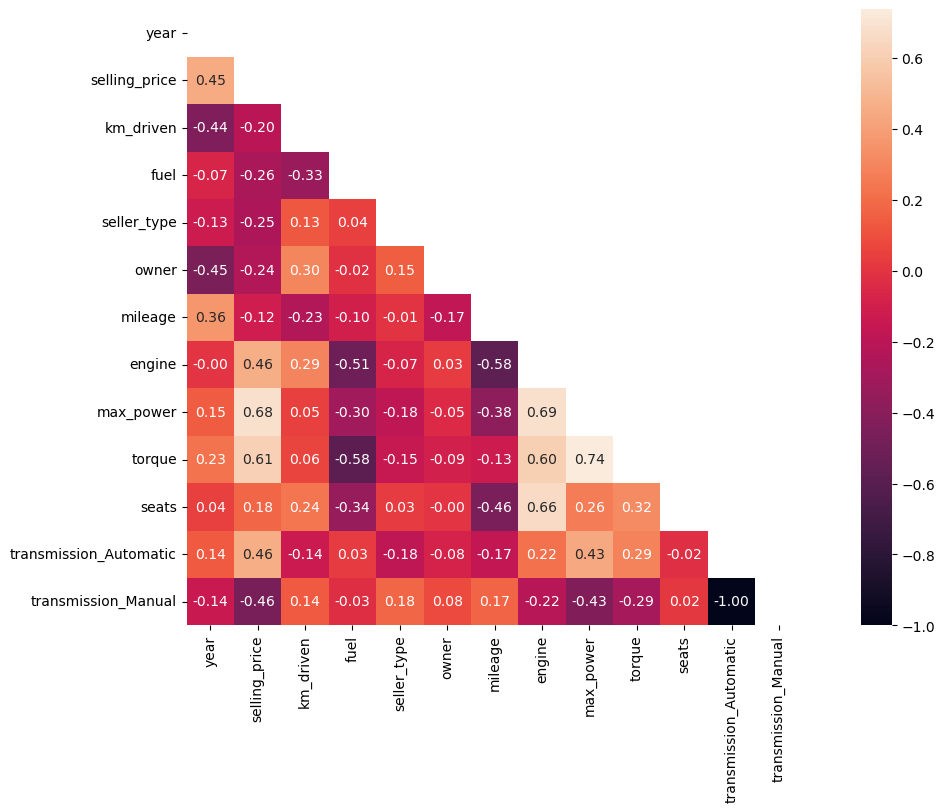

In [11]:
plt.figure(figsize=(15,8))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr,square=True, mask= mask, annot= True, fmt = '.2f')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


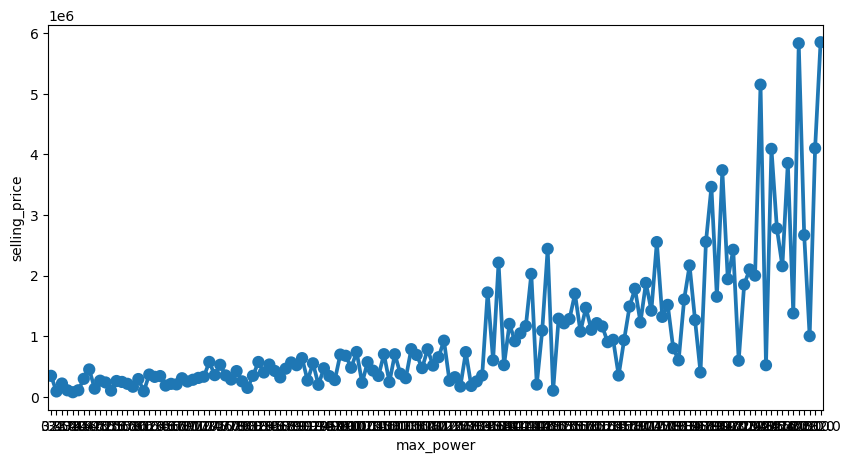

In [16]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'max_power', y = 'selling_price', data = df, errorbar=None);
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


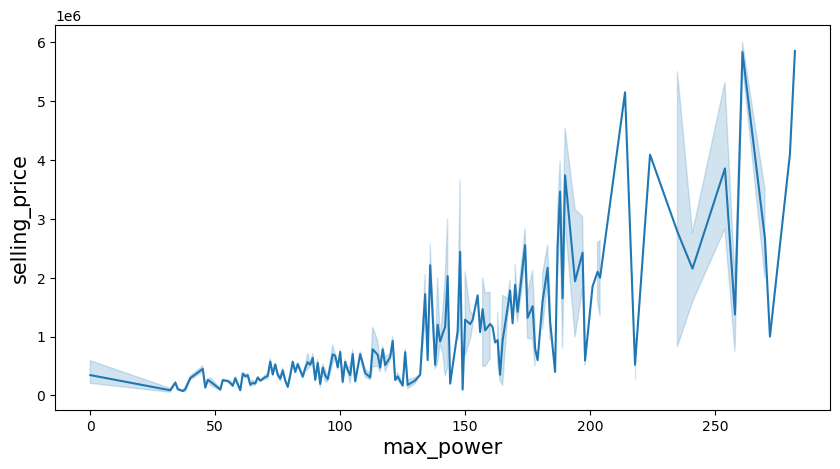

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel("max_power", fontsize = 15)
plt.ylabel("selling_price", fontsize = 15)
sns.lineplot(x = 'max_power', y = 'selling_price', data = df);

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


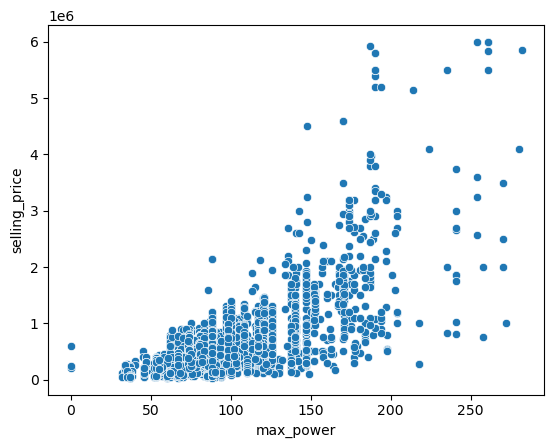

In [21]:
sns.scatterplot(x = 'max_power',y = 'selling_price',  data = df)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

# Linear Regression(Single Variable)

In [52]:
X = df[['max_power']]
y = df[['selling_price']]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Regression Model
model = LinearRegression()

# Training Regression Model
model.fit(X_train, y_train)
print(f'Model Conf : {model.coef_}')   
print(f'Model Intercept : {model.intercept_}') 

# Predict Values For Real Values
y_pred = model.predict(X_test)

# Calculate The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate The R-Score
r2 = r2_score(y_test, y_pred)

# Show Result
print(f'MSE : {mse}')
print(f'R Square : {r2}')

Model Conf : [[9929.60717672]]
Model Intercept : [-362177.37203504]
MSE : 116909270181.68996
R Square : 0.460979014351649


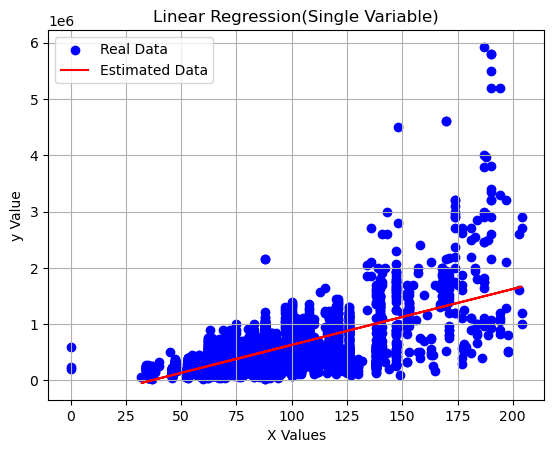

In [46]:
# Real Data Plot
plt.scatter(X_train, y_train, color='blue')

# Estimate Line Drawing
plt.plot(X_test, y_pred, color='red')

# Labels For Plot
plt.xlabel('X Values')
plt.ylabel('y Value')
plt.title('Linear Regression(Single Variable)')
plt.legend(['Real Data', 'Estimated Data'])
plt.grid(True)
plt.show()

# # Linear Regression(Multi Variable)

In [54]:
X1 = df[['max_power']]
X2 = df[['torque']]
y = df[['selling_price']]

# Merge two array and create matrix
X = np.hstack((X1, X2))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create Regression Model
model = LinearRegression()

# Training Regression Model
model.fit(X_train, y_train)
print(f'Model Conf : {model.coef_}') # تتا 1
print(f'Model Intercept : {model.intercept_}') # تتا 0

# Predict Values For Real Values
y_pred = model.predict(X_test)

# Calculate The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate The R-Score
r2 = r2_score(y_test, y_pred)

# Show Result
print(f'MSE : {mse}')
print(f'R Square : {r2}')

Model Conf : [[7367.60002109 1193.77104456]]
Model Intercept : [-331273.21039901]
MSE : 111181660723.37679
R Square : 0.48738668665026796


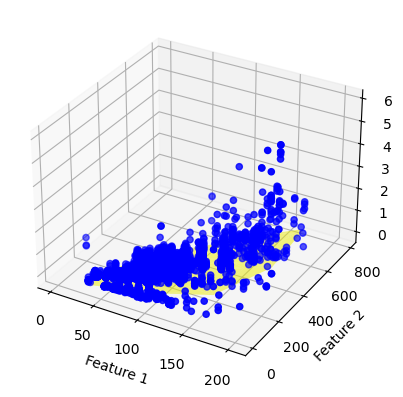

In [55]:
# Draw A Regression Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Real Data Plot
ax.scatter(X[:,0], X[:,1], y, color='blue')

# Estimated Area Drawing
ax.plot_trisurf(X_test[:,0].flatten(), X_test[:,1].flatten(), y_pred.flatten(), color='#ff0', alpha = 0.5)

# Add Labels To Plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

# Polynomial Regression

In [76]:
features =['max_power', 'torque', 'year', 'engine', 'mileage', 'seats', 'transmission_Automatic']
X = df[features]
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
model.score(X_test_poly, y_test)

0.8612864065943535

# Search Hyperparameter Tuning

In [102]:
X = df.drop('selling_price', axis=1)
y = df[['selling_price']]

model = ElasticNet()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}

random_search = RandomizedSearchCV(
                                    estimator=model,
                                    param_distributions=params,
                                    scoring='r2',
                                    cv=5,
                                    n_iter=3,
                                    verbose=3)

random_search.fit(X_train, y_train)

print("RandomizedSearchCV : \n===============================")
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........alpha=0.5, l1_ratio=0.4;, score=0.672 total time=   0.0s
[CV 2/5] END ...........alpha=0.5, l1_ratio=0.4;, score=0.705 total time=   0.0s
[CV 3/5] END ...........alpha=0.5, l1_ratio=0.4;, score=0.590 total time=   0.0s
[CV 4/5] END ...........alpha=0.5, l1_ratio=0.4;, score=0.633 total time=   0.0s
[CV 5/5] END ...........alpha=0.5, l1_ratio=0.4;, score=0.601 total time=   0.0s
[CV 1/5] END ...........alpha=0.4, l1_ratio=0.2;, score=0.671 total time=   0.0s
[CV 2/5] END ...........alpha=0.4, l1_ratio=0.2;, score=0.705 total time=   0.0s
[CV 3/5] END ...........alpha=0.4, l1_ratio=0.2;, score=0.589 total time=   0.0s
[CV 4/5] END ...........alpha=0.4, l1_ratio=0.2;, score=0.632 total time=   0.0s
[CV 5/5] END ...........alpha=0.4, l1_ratio=0.2;, score=0.600 total time=   0.0s
[CV 1/5] END ..........alpha=0.01, l1_ratio=0.3;, score=0.685 total time=   0.0s
[CV 2/5] END ..........alpha=0.01, l1_ratio=0.3;,

# Elastic Net & Ridge & Lasso Regression

In [103]:
X = df.drop('selling_price', axis=1)
y = df[['selling_price']]
X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

elastic = ElasticNet(alpha=0.01,l1_ratio=0.3)
elastic.fit(X_train,y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))

0.6561196096646664
0.6008723014280444
0.6561196096717049
0.6008725106051152
0.6560261431520424
0.6000044207093007
